# **Lecture5 homework: wind turbulence statistics**

Name: 宋顺

Stuent ID: 24S154105

## **Question**

There are two sets of spatial (vertical z and transverse y) wind velocity time history records, with a duration of 10 minutes and a sampling frequency of 100 Hz (i.e., a time interval of 0.01 s). The data are stored in the windData folder.

### 1 Measurement point coordinates

(1) Z-direction measurement point coordinates
| Num. | 1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- |
| x(m) | 0 | 0 | 0 | 0 | 0 |
| y(m) | 0 | 0 | 0 | 0 | 0 |
| z(m) | 10 | 30 | 50 | 70 | 90 |

(2) Y-direction measurement point coordinates
| Num. | 1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- |
| x(m) | 0 | 0 | 0 | 0 | 0 |
| y(m) | 0 | 20 | 40 | 60 | 80 |
| z(m) | 50 | 50 | 50 | 50 | 50 |

### 2 Target turbulence characteristics
(1) Mean velocity profile
\begin{gather}
U_{avg}(z) = U_r \left(\frac{z}{z_r}\right)^\alpha \\
U_r=50\, \text{m/s},\ z_r=160\, \text{m},\ \alpha=0.22
\end{gather}

(2) Turbulence intensity profiles
\begin{gather}
I_u(z)=I_{10}\left ( \frac{z}{10}  \right )^{-\alpha}, \ I_v(z)=0.78I_u(z), \ I_w(z)=0.55I_u(z) \\
I_{10}=0.23,\alpha=0.22
\end{gather}

(3) Turbulence integral scale profiles
\begin{gather}
L_u^x(z)=100\left ( \frac{z}{30}  \right )^{0.5}, \ L_v^x(z)=0.5L_u^x(z), \ L_w^x(z)=0.5L_u^x(z) \\
\end{gather}

(4) Von Kármán wind spectra
\begin{gather}
S_u(f)=\frac{4(I_u U_{avg})^2(L_u^x/U_{avg})}{\left [ 1+70.8(fL_u^x/U_{avg})^2 \right ]^{5/6}} \\
S_v(f)=\frac{4(I_v U_{avg})^2(L_v^x/U_{avg})(1+188.4(2fL_v^x/U_{avg})^2)}{\left [ 1+70.8(2fL_v^x/U_{avg})^2 \right ]^{11/6}}  \\
S_w(f)=\frac{4(I_w U_{avg})^2(L_w^x/U_{avg})(1+188.4(2fL_w^x/U_{avg})^2)}{\left [ 1+70.8(2fL_w^x/U_{avg})^2 \right ]^{11/6}} 
\end{gather}

(5) Spatial correlation coefficient in the y-direction proposed by Shiotani  
\begin{gather}
\rho_u^y(r)=e^{-\left | r \right | /L_u^y} \\
\rho_v^y(r)=e^{-\left | r \right | /L_v^y} \\
\rho_w^y(r)=e^{-\left | r \right | /L_w^y} \\
L_u^y=60m,\ L_v^y=50m,\ L_w^y=40m
\end{gather}

### 3 Assignment requirements
Read the wind data in the `windData` folder according to the requirements below, calculate the turbulence characteristics, and plot them (the given target turbulence characteristics should be plotted together).

#### **For the z-direction wind velocity time history, calculate:**

(1) Mean velocity profile (calculate the U-component of velocity)

(2) Turbulence intensity profiles (calculate the fluctuating velocity components u, v, and w)

(3) Wind power spectral density (select one point and calculate the fluctuating velocity components u, v, and w)

(4) Probability density curve (select one point, calculate the fluctuating velocity components u, v, and w, and plot the corresponding normal distribution curve)

#### **For the y-direction wind velocity time history, calculate:**

(1) Spatial correlation coefficient in the y-direction (using the first point as the reference point, calculate the fluctuating velocity components u, v, and w)


# 摘要 (Abstract)
该文档描述了一项关于风湍流统计分析的作业要求。作业主要围绕两组空间风速时间序列数据展开，要求学生根据这些数据计算并绘制出多个风湍流特征参数，包括平均速度剖面、湍流强度剖面、风功率谱密度、概率密度曲线以及空间相关系数。同时，需要将计算结果与给定的目标湍流特征进行对比，以此来评估学生对风湍流统计特性的理解和应用能力。

# 关键点 (Key Points)
给出了两组风速时间序列数据，分别对应于垂直方向 (z方向) 和横向方向 (y方向) 的测量点。
明确了风速数据的采样频率为100Hz，采样时长为10分钟。
设定了目标湍流特性，包括平均速度剖面、湍流强度剖面和湍流积分尺度剖面等。
要求计算z方向的平均速度剖面，并与目标平均速度剖面进行对比。
要求计算z方向的湍流强度剖面（u, v, w三个分量）并与目标湍流强度剖面进行对比。
要求计算指定点风速的功率谱密度，绘制功率谱密度曲线。
要求计算指定点风速的概率密度曲线，并与正态分布曲线进行对比。
要求计算y方向的空间相关系数（u, v, w三个分量），并与理论空间相关系数进行对比。

## **Answer**

### 1 Statistical results of the z-direction wind velocity time history

In [1]:
import scipy.io as sio

# load data
simDataPath = './windData/zDirData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)
U = simData['U']
V = simData['V']
W = simData['W']
X = simData['X']
Y = simData['Y']
Z = simData['Z']
dt = simData['dt']
del simData

#### 1.1 Mean velocity profile

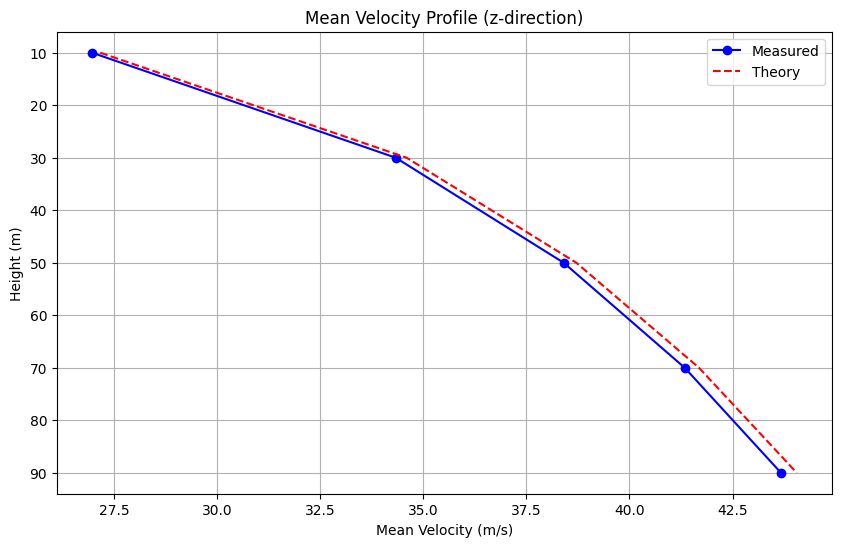

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.stats import norm

# 读取 Z、Y方向数据
Y_positions = [0, 20, 40, 60, 80]  # y方向测点位置
heights_z = [10, 30, 50, 70, 90]  # z方向测点高度


def plot_mean_velocity(U, heights, Ur=50, zr=160, alpha=0.22):
    # 计算实测平均值
    U_avg_measured = np.mean(U, axis=1)
    
    # 计算理论模型
    z_values = np.array(heights)
    U_avg_theory = Ur * (z_values / zr)**alpha
    
    # 绘图
    plt.figure(figsize=(10, 6))
    plt.plot(U_avg_measured, heights, 'bo-', label='Measured')
    plt.plot(U_avg_theory, heights, 'r--', label='Theory')
    plt.xlabel('Mean Velocity (m/s)')
    plt.ylabel('Height (m)')
    plt.title('Mean Velocity Profile (z-direction)')
    plt.legend()
    plt.grid()
    plt.gca().invert_yaxis()
    plt.show()

plot_mean_velocity(U, heights_z)

#### 1.2 Turbulence intensity profile

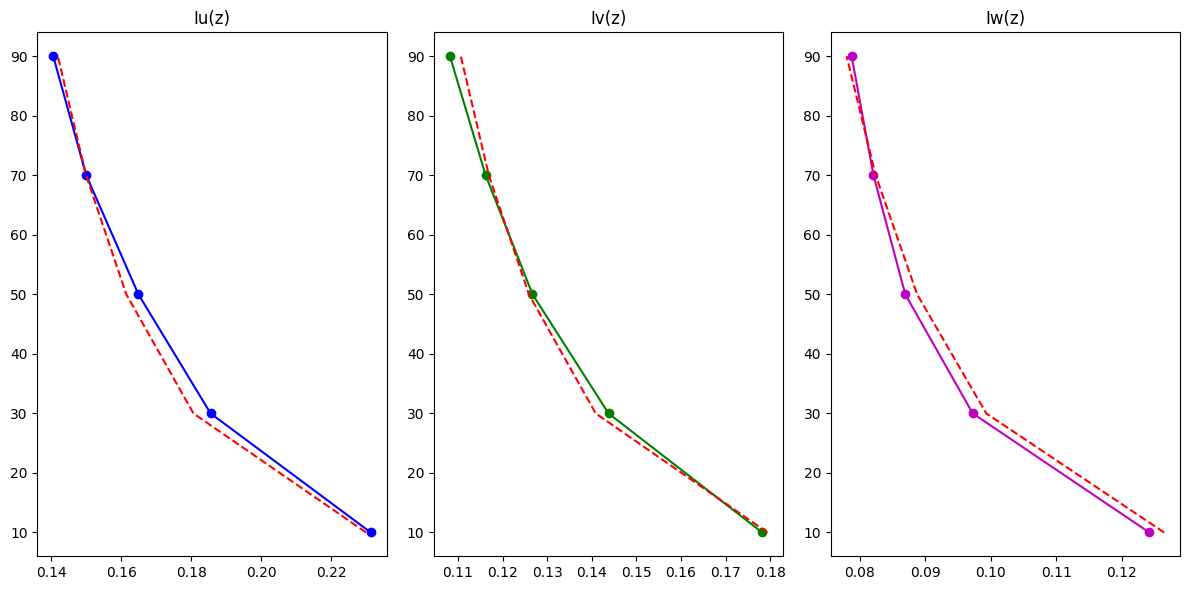

In [3]:
def turbulence_intensity(U, V, W, heights, I10=0.23, alpha=0.22):
    # 计算脉动速度标准差
    u_prime = U - np.mean(U, axis=1, keepdims=True)
    v_prime = V - np.mean(V, axis=1, keepdims=True)
    w_prime = W - np.mean(W, axis=1, keepdims=True)
    
    Iu_measured = np.std(u_prime, axis=1) / np.mean(U, axis=1)
    Iv_measured = np.std(v_prime, axis=1) / np.mean(U, axis=1)
    Iw_measured = np.std(w_prime, axis=1) / np.mean(U, axis=1)
    
    # 理论湍流强度
    z = np.array(heights)
    Iu_theory = I10 * (z / 10)**(-alpha)
    Iv_theory = 0.78 * Iu_theory
    Iw_theory = 0.55 * Iu_theory
    
    # 绘图
    plt.figure(figsize=(12, 6))
    plt.subplot(131)
    plt.plot(Iu_measured, heights, 'bo-', label='Measured')
    plt.plot(Iu_theory, heights, 'r--', label='Theory')
    plt.title('Iu(z)')
    
    plt.subplot(132)
    plt.plot(Iv_measured, heights, 'go-', label='Measured')
    plt.plot(Iv_theory, heights, 'r--', label='Theory')
    plt.title('Iv(z)')
    
    plt.subplot(133)
    plt.plot(Iw_measured, heights, 'mo-', label='Measured')
    plt.plot(Iw_theory, heights, 'r--', label='Theory')
    plt.title('Iw(z)')
    
    plt.tight_layout()
    plt.show()

turbulence_intensity(U, V, W, heights_z)

#### 1.3 Wind power spectral density

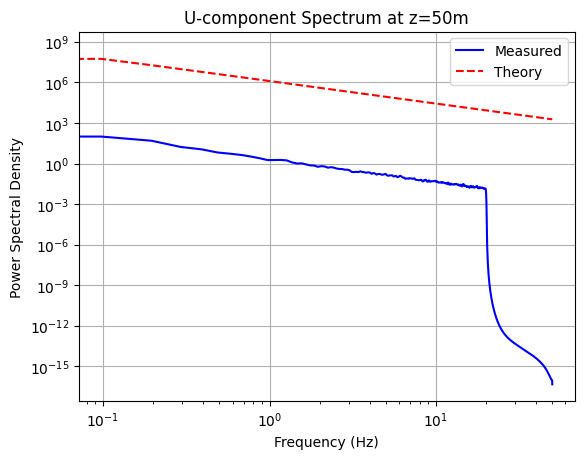

In [4]:
# 计算风功率谱密度（z方向，选z=50m测点）
def wind_spectrum(u_prime, dt, L_u, U_avg, component='u'):
    fs = 1 / dt
    f, Su = signal.welch(u_prime, fs, nperseg=1024)
    
    # Von Karman 理论谱
    if component == 'u':
        Su_theory = (4 * (L_u * U_avg)**2 * (L_u / U_avg)) / \
                   (1 + 70.8 * (L_u * f / U_avg)**2)**(5/6)
    elif component == 'v':
        Su_theory = (4 * (L_u * U_avg)**2 * (L_u / U_avg) * (1 + 188.4 * (2 * L_u * f / U_avg)**2)) / \
                   (1 + 70.8 * (2 * L_u * f / U_avg)**2)**(11/6)
    elif component == 'w':
        Su_theory = (4 * (L_u * U_avg)**2 * (L_u / U_avg) * (1 + 188.4 * (2 * L_u * f / U_avg)**2)) / \
                   (1 + 70.8 * (2 * L_u * f / U_avg)**2)**(11/6)
    
    # 绘图
    plt.loglog(f, Su, 'b', label='Measured')
    plt.loglog(f, Su_theory, 'r--', label='Theory')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density')
    plt.title(f'{component.upper()}-component Spectrum at z=50m')
    plt.legend()
    plt.grid()
    plt.show()


idx = 2
u_prime = U[idx] - np.mean(U[idx])
L_u = 100 * (heights_z[idx] / 30)**0.5  
wind_spectrum(u_prime, dt=0.01, L_u=L_u, U_avg=np.mean(U[idx]), component='u')

#### 1.4 Probability density curve

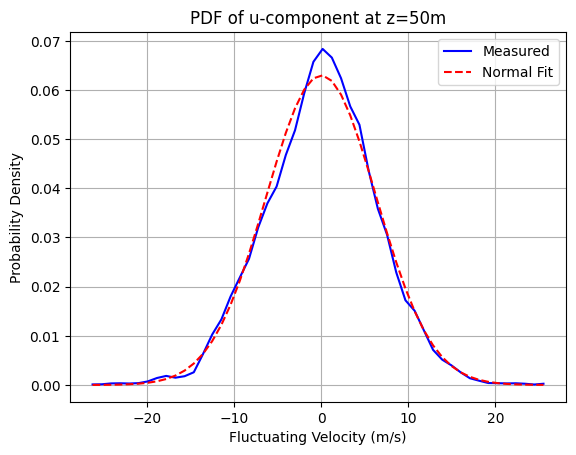

In [5]:
def plot_pdf(u_prime):
    # 计算直方图
    hist, bins = np.histogram(u_prime, bins=50, density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    # 拟合正态分布
    mu, std = norm.fit(u_prime)
    pdf_theory = norm.pdf(bin_centers, mu, std)
    
    # 绘图
    plt.plot(bin_centers, hist, 'b-', label='Measured')
    plt.plot(bin_centers, pdf_theory, 'r--', label='Normal Fit')
    plt.xlabel('Fluctuating Velocity (m/s)')
    plt.ylabel('Probability Density')
    plt.title('PDF of u-component at z=50m')
    plt.legend()
    plt.grid()
    plt.show()

plot_pdf(u_prime)


### 2 Statistical results of the y-direction wind velocity time history

In [6]:
# load data
simDataPath = './windData/yDirData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)
U = simData['U']
V = simData['V']
W = simData['W']
X = simData['X']
Y = simData['Y']
Z = simData['Z']
dt = simData['dt']
del simData

#### 2.1 Spatial correlation coefficient in y direction

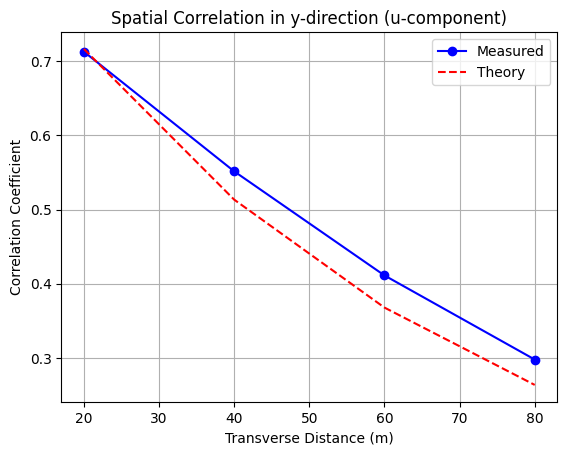

In [7]:
def spatial_correlation(U, Y_positions, L_prime=60):
    # 以第一个测点（y=0）为参考
    ref_u = U[0]
    correlations = []
    distances = []
    
    for i in range(1, 5):
        target_u = U[i]
        corr = np.corrcoef(ref_u, target_u)[0, 1]
        correlations.append(corr)
        distances.append(Y_positions[i] - Y_positions[0])
    
    # 理论模型
    r = np.array(distances)
    rho_theory = np.exp(-r / L_prime)
    
    # 绘图
    plt.plot(distances, correlations, 'bo-', label='Measured')
    plt.plot(distances, rho_theory, 'r--', label='Theory')
    plt.xlabel('Transverse Distance (m)')
    plt.ylabel('Correlation Coefficient')
    plt.title('Spatial Correlation in y-direction (u-component)')
    plt.legend()
    plt.grid()
    plt.show()

spatial_correlation(U, Y_positions, L_prime=60)